In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("Mall_Customers.csv")  
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.rename(columns={
    "Annual_Income_(k$)": "Annual_Income",
    "Spending_Score": "Spending_Score"
}, inplace=True)


In [7]:
# Selecting relevant features for segmentation
features = df[["Age", "Annual_Income", "Spending_Score"]]


In [9]:
# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

In [10]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

NameError: name 'wcss' is not defined

<Figure size 800x500 with 0 Axes>

In [11]:
optimal_clusters = 5  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(features_scaled)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


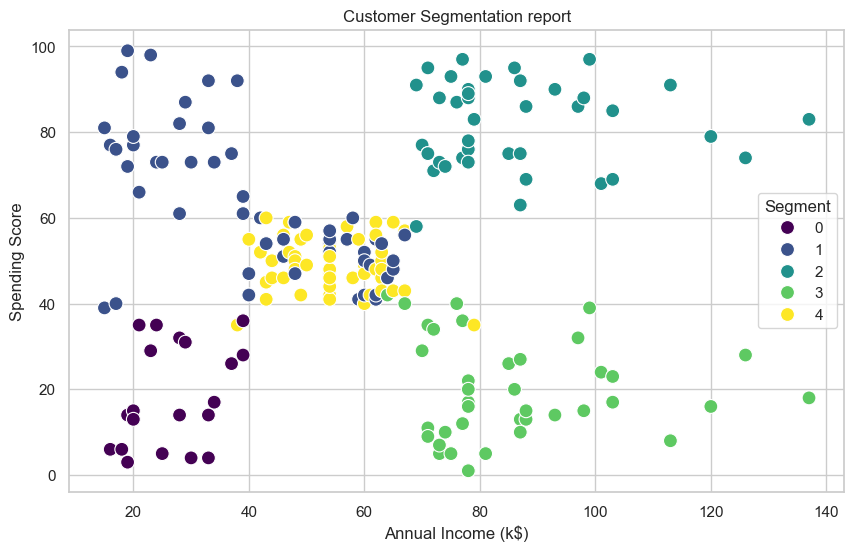

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Segment'], palette='viridis', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation report")
plt.legend(title="Segment")
plt.show()

In [13]:
print(df.head())

   CustomerID   Genre  Age  Annual_Income  Spending_Score  Segment
0           1    Male   19             15              39        1
1           2    Male   21             15              81        1
2           3  Female   20             16               6        0
3           4  Female   23             16              77        1
4           5  Female   31             17              40        1
